# Preprocess dataset for location of interest for analysis
In this notebook, I show what the preprocessing class (report_functions.WaterQualityProcessor) does - 
using SSD as location.
You need to download the data as explained in https://github.com/lonanni/InnovationProject_WaterQuality/blob/main/Build_WaterQualityDataset.ipynb to use this notebook. 

In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import mplt_style_n
import os 
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

plt.style.use(mplt_style_n.style1)

In [3]:
data_dir = "./data"

In [4]:
region_code = "SSD" #change it for the region code of your region of interest


Load the dataset as build in Build_WaterQualityDataset

In [5]:
df = pd.read_csv(data_dir+'/'+region_code+'WaterQualityData.csv', );

### 1) Key determinants selection + Pivot 
#### These steps are automatic report_functions.WaterQualityProcessor.pivot function

### The dataset contains lots of determinants that are not frequently observed, and therefore they are not good to study how pollution has evolved in time, we keep only frequent results, i.e. quantities that have been studied frequently in time. If a determinant is recorded less than 25% of the time, it is excluded
These datasets can be big and the operation might take a few minutes. 

In [6]:
determinants = set(df['determinand.definition'])

sampling_time = set(df['sample.sampleDateTime'])


frequent_determinant = []

for det in determinants:
    if len(df[df['determinand.definition']== det]["result"])>len(sampling_time)/4:
        frequent_determinant.append(det)

In [7]:
set(frequent_determinant)

{'Ammonia un-ionised as N',
 'Ammoniacal Nitrogen as N',
 'BOD : 5 Day ATU',
 'Chloride',
 'Nitrate as N',
 'Nitrite as N',
 'Nitrogen, Total Oxidised as N',
 'Orthophosphate, reactive as P',
 'Oxygen, Dissolved, % Saturation',
 'Solids, Suspended at 105 C',
 'Temperature of Water',
 'pH'}

In [8]:
df_sub = df[df['determinand.definition'].isin(frequent_determinant)]

In [9]:
df_sub.columns

Index(['Unnamed: 0', '@id', 'sample.samplingPoint',
       'sample.samplingPoint.notation', 'sample.samplingPoint.label',
       'sample.sampleDateTime', 'determinand.label', 'determinand.definition',
       'determinand.notation', 'resultQualifier.notation', 'result',
       'codedResultInterpretation.interpretation', 'determinand.unit.label',
       'sample.sampledMaterialType.label', 'sample.isComplianceSample',
       'sample.purpose.label', 'sample.samplingPoint.easting',
       'sample.samplingPoint.northing'],
      dtype='object')

In [10]:
df_sub.head()

,Unnamed: 0,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
0,0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,BOD ATU,BOD : 5 Day ATU,85,<,3.00,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570
1,1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.50,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570
2,2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,pH,pH,61,NaN,7.15,NaN,phunits,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570
3,3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,Chloride Ion,Chloride,172,NaN,14.10,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570
7,7,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A09,APSLEY FARM BOREHOLE B,2000-03-22T10:55:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.50,NaN,mg/l,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570


In [11]:
piv = df_sub.pivot(index=['sample.sampleDateTime', "sample.samplingPoint.easting","sample.samplingPoint.northing",  
                          "sample.sampledMaterialType.label", '@id'],\
                   columns=['determinand.definition'], values='result').reset_index()

In [12]:
piv.columns.name = None


In [13]:
piv.head()

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,@id,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,BOD : 5 Day ATU,Chloride,Nitrate as N,Nitrite as N,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved, % Saturation","Solids, Suspended at 105 C",Temperature of Water,pH
0,2000-01-04T00:01:00,511100,131100,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
1,2000-01-04T11:09:00,441520,91230,ESTUARINE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8
2,2000-01-04T11:09:00,441520,91230,ESTUARINE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.9,NaN
3,2000-01-04T11:09:00,441520,91230,ESTUARINE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-04T11:09:00,441520,91230,ESTUARINE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,0.168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can check that with the pivot, we do not affect data

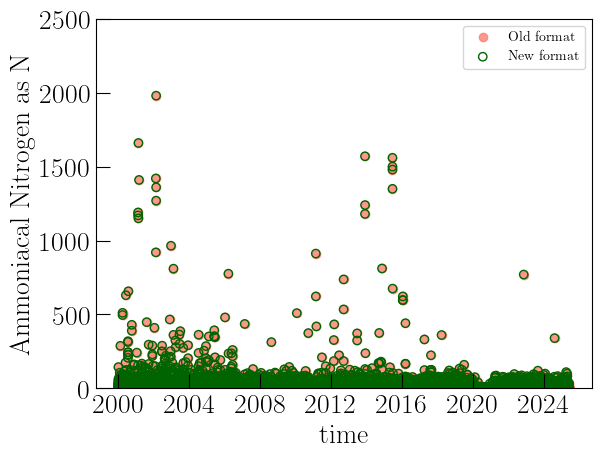

In [14]:
plt.scatter(pd.to_datetime(df_sub[df_sub['determinand.definition']== 'Ammoniacal Nitrogen as N']['sample.sampleDateTime'])\
         , df_sub[df_sub['determinand.definition']== 'Ammoniacal Nitrogen as N']["result"], label = "Old format", color="salmon",
           alpha=0.8) # old dataset format
plt.scatter(pd.to_datetime(piv['sample.sampleDateTime'])\
         , piv['Ammoniacal Nitrogen as N'], edgecolor='darkgreen', facecolor="None", label="New format") # new dataset format
plt.legend()
plt.xlabel("time")
plt.ylabel("Ammoniacal Nitrogen as N")
plt.ylim(0, 2500)
plt.show()

### 2) Missing values

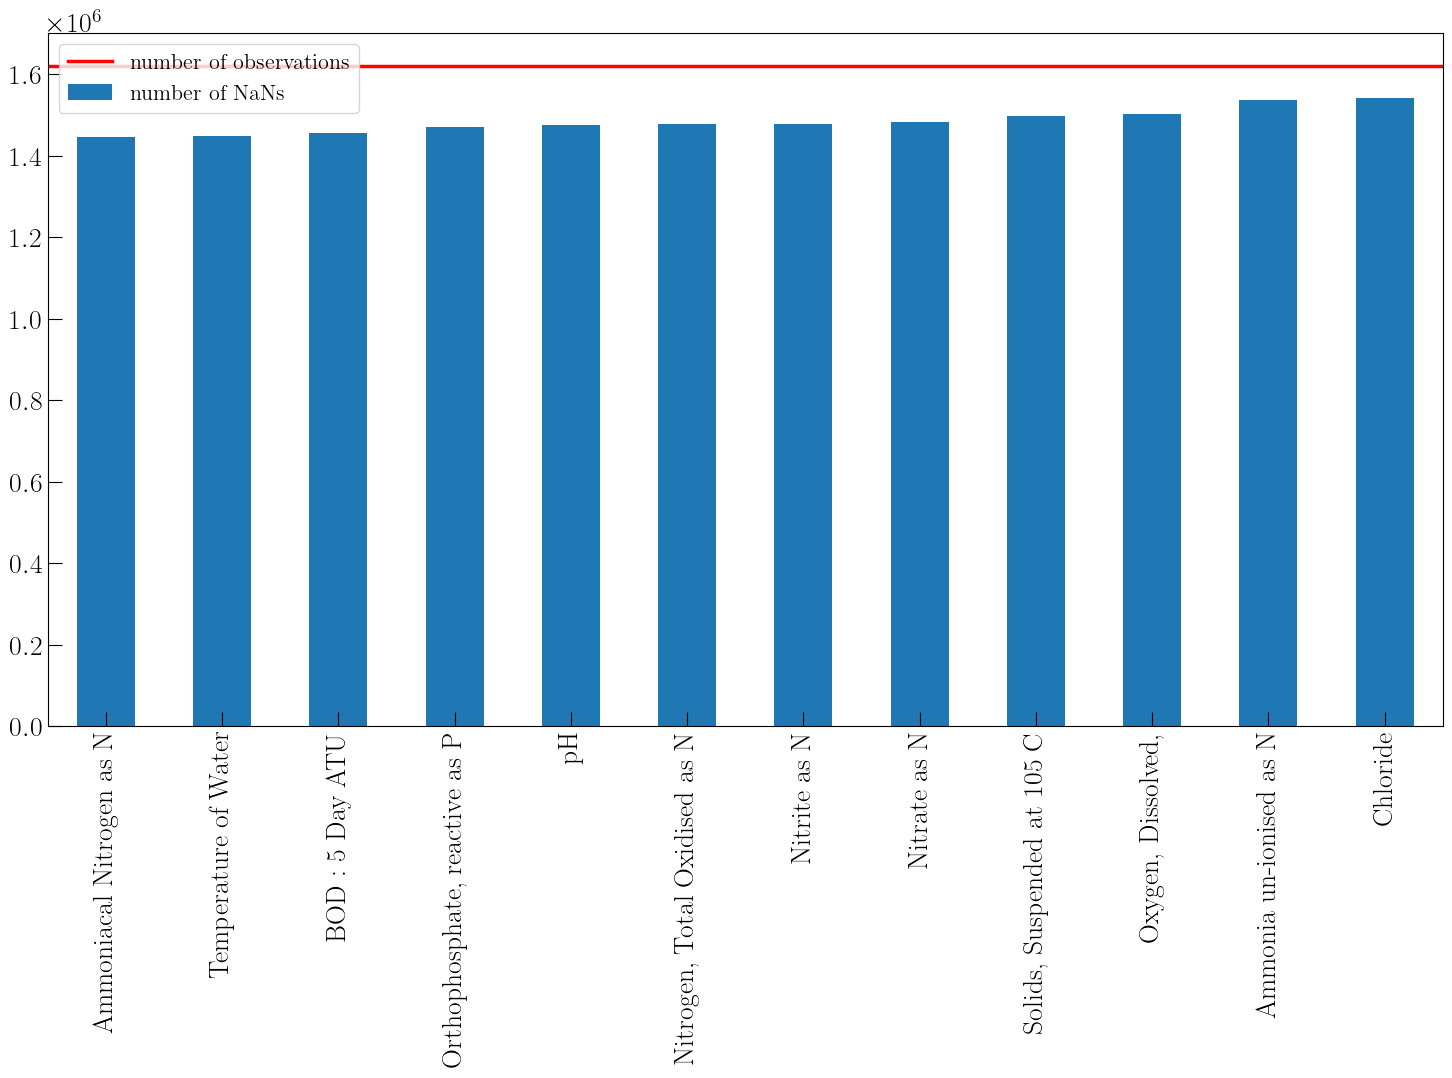

In [15]:
missing = piv.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
f, ax = plt.subplots(figsize=(18,9))


missing.plot.bar(label="number of NaNs");
plt.axhline(y=piv.shape[0], color="red", label="number of observations")
plt.legend(fontsize=16);

### 3) Removing outliers
#### - This step is automatic report_functions.WaterQualityProcessor.quantiles_check function


In [16]:
piv.select_dtypes(include=[np.float64]).columns

Index(['Ammonia un-ionised as N', 'Ammoniacal Nitrogen as N',
       'BOD : 5 Day ATU', 'Chloride', 'Nitrate as N', 'Nitrite as N',
       'Nitrogen, Total Oxidised as N', 'Orthophosphate, reactive as P',
       'Oxygen, Dissolved, % Saturation', 'Solids, Suspended at 105 C',
       'Temperature of Water', 'pH'],
      dtype='object')

In [17]:
quantities = piv.select_dtypes(include=[np.float64]).columns
q_low = piv[quantities[0::]].quantile(0.01)
q_hi  = piv[quantities[0::]].quantile(0.99)
df_piv_out = piv.copy()
df_piv_out[quantities[0::]] = np.where( ((piv[quantities[0::]] < q_hi) & (piv[quantities[0::]] > q_low)), \
                                       piv[quantities[0::]], np.nan)

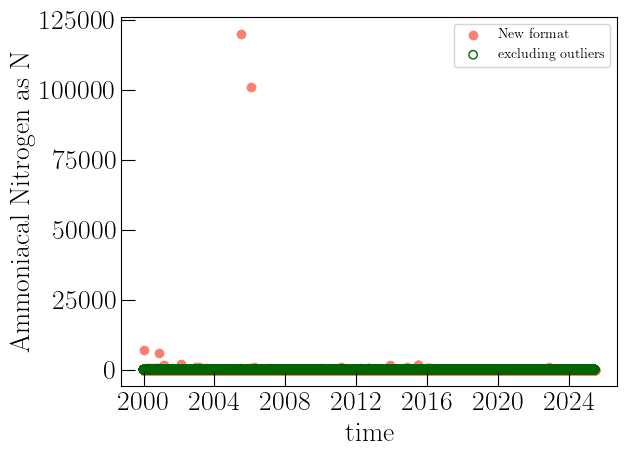

In [18]:
plt.scatter(pd.to_datetime(piv['sample.sampleDateTime'])\
         , piv['Ammoniacal Nitrogen as N'], facecolor='salmon', label="New format") # new dataset format
plt.scatter(pd.to_datetime(df_piv_out['sample.sampleDateTime'])\
         , df_piv_out['Ammoniacal Nitrogen as N'], edgecolor='darkgreen', facecolor='none', label="excluding outliers") # new dataset format
plt.legend()
plt.xlabel("time")
plt.ylabel("Ammoniacal Nitrogen as N")
plt.show()


In [19]:
piv = df_piv_out.copy()

### 4) Encoding Season

#### - This step is automatic report_functions.WaterQualityProcessor.season function

#### It is common practice to divide the datasets into summer and winter seasons, since water quality hasa  strong correlation with the seasonality of farming

In [20]:
piv.loc[:, "Date"] = pd.to_datetime(piv['sample.sampleDateTime']).dt.date.values
piv.loc[:,"year"] = pd.to_datetime(piv['Date']).dt.year
piv.loc[:,"month"] = pd.to_datetime(piv['Date']).dt.month
piv["season"] = np.where((piv["month"]>4)&(piv["month"]<9), 0, 1)
piv = piv.sort_values(by="Date", ascending=True)

### 5) Water labels
#### - automatic report_functions.WaterQualityProcessor.filter_top_water_types

In [21]:
set(np.unique(piv["sample.sampledMaterialType.label"]))

{'ANY BIOTA',
 'ANY LEACHATE',
 'ANY NON-AQUEOUS LIQUID',
 'ANY SEWAGE',
 'ANY SEWAGE SLUDGE',
 'ANY SOLID/SEDIMENT - UNSPECIFIED',
 'ANY TRADE EFFLUENT',
 'ANY WATER',
 'CALIBRATION WATER',
 'CANAL WATER',
 'CRUDE SEWAGE',
 'ESTUARINE WATER',
 'ESTUARINE WATER AT HIGH TIDE',
 'ESTUARY SEDIMENT',
 'ESTUARY SEDIMENT - SUB TIDAL',
 'FINAL SEWAGE EFFLUENT',
 'GROUNDWATER',
 'GROUNDWATER - PURGED/PUMPED/REFILLED',
 'MYTILUS EDULIS - MUSSEL - WHOLE ANIMAL',
 'OSTEREA EDULIS - NATIVE OYSTER - WHOLE ANIMAL',
 'POND / LAKE / RESERVOIR WATER',
 'POND / LAKE / RESERVOIR WATER SEDIMENT',
 'POTABLE WATER',
 'PRECIPITATION',
 'RIVER / RUNNING SURFACE WATER',
 'RUNNING SURFACE WATER SEDIMENT',
 'SEA WATER',
 'STORM SEWER OVERFLOW DISCHARGE',
 'STORM TANK EFFLUENT',
 'SURFACE DRAINAGE',
 'TRADE EFFLUENT - FRESHWATER RETURNED ABSTRACTED',
 'UNCODED'}

In [22]:
frequency = piv[["year", "sample.sampledMaterialType.label"]]
data = frequency.groupby(["year","sample.sampledMaterialType.label"]).size()
from matplotlib import cm
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(df_sub["sample.sampledMaterialType.label"]))))


In [23]:
water_names = df_piv_out.groupby(["sample.sampledMaterialType.label"]).count().sort_values(by="sample.samplingPoint.easting", ascending=False)\
["sample.samplingPoint.easting"]\
.index.get_level_values("sample.sampledMaterialType.label")

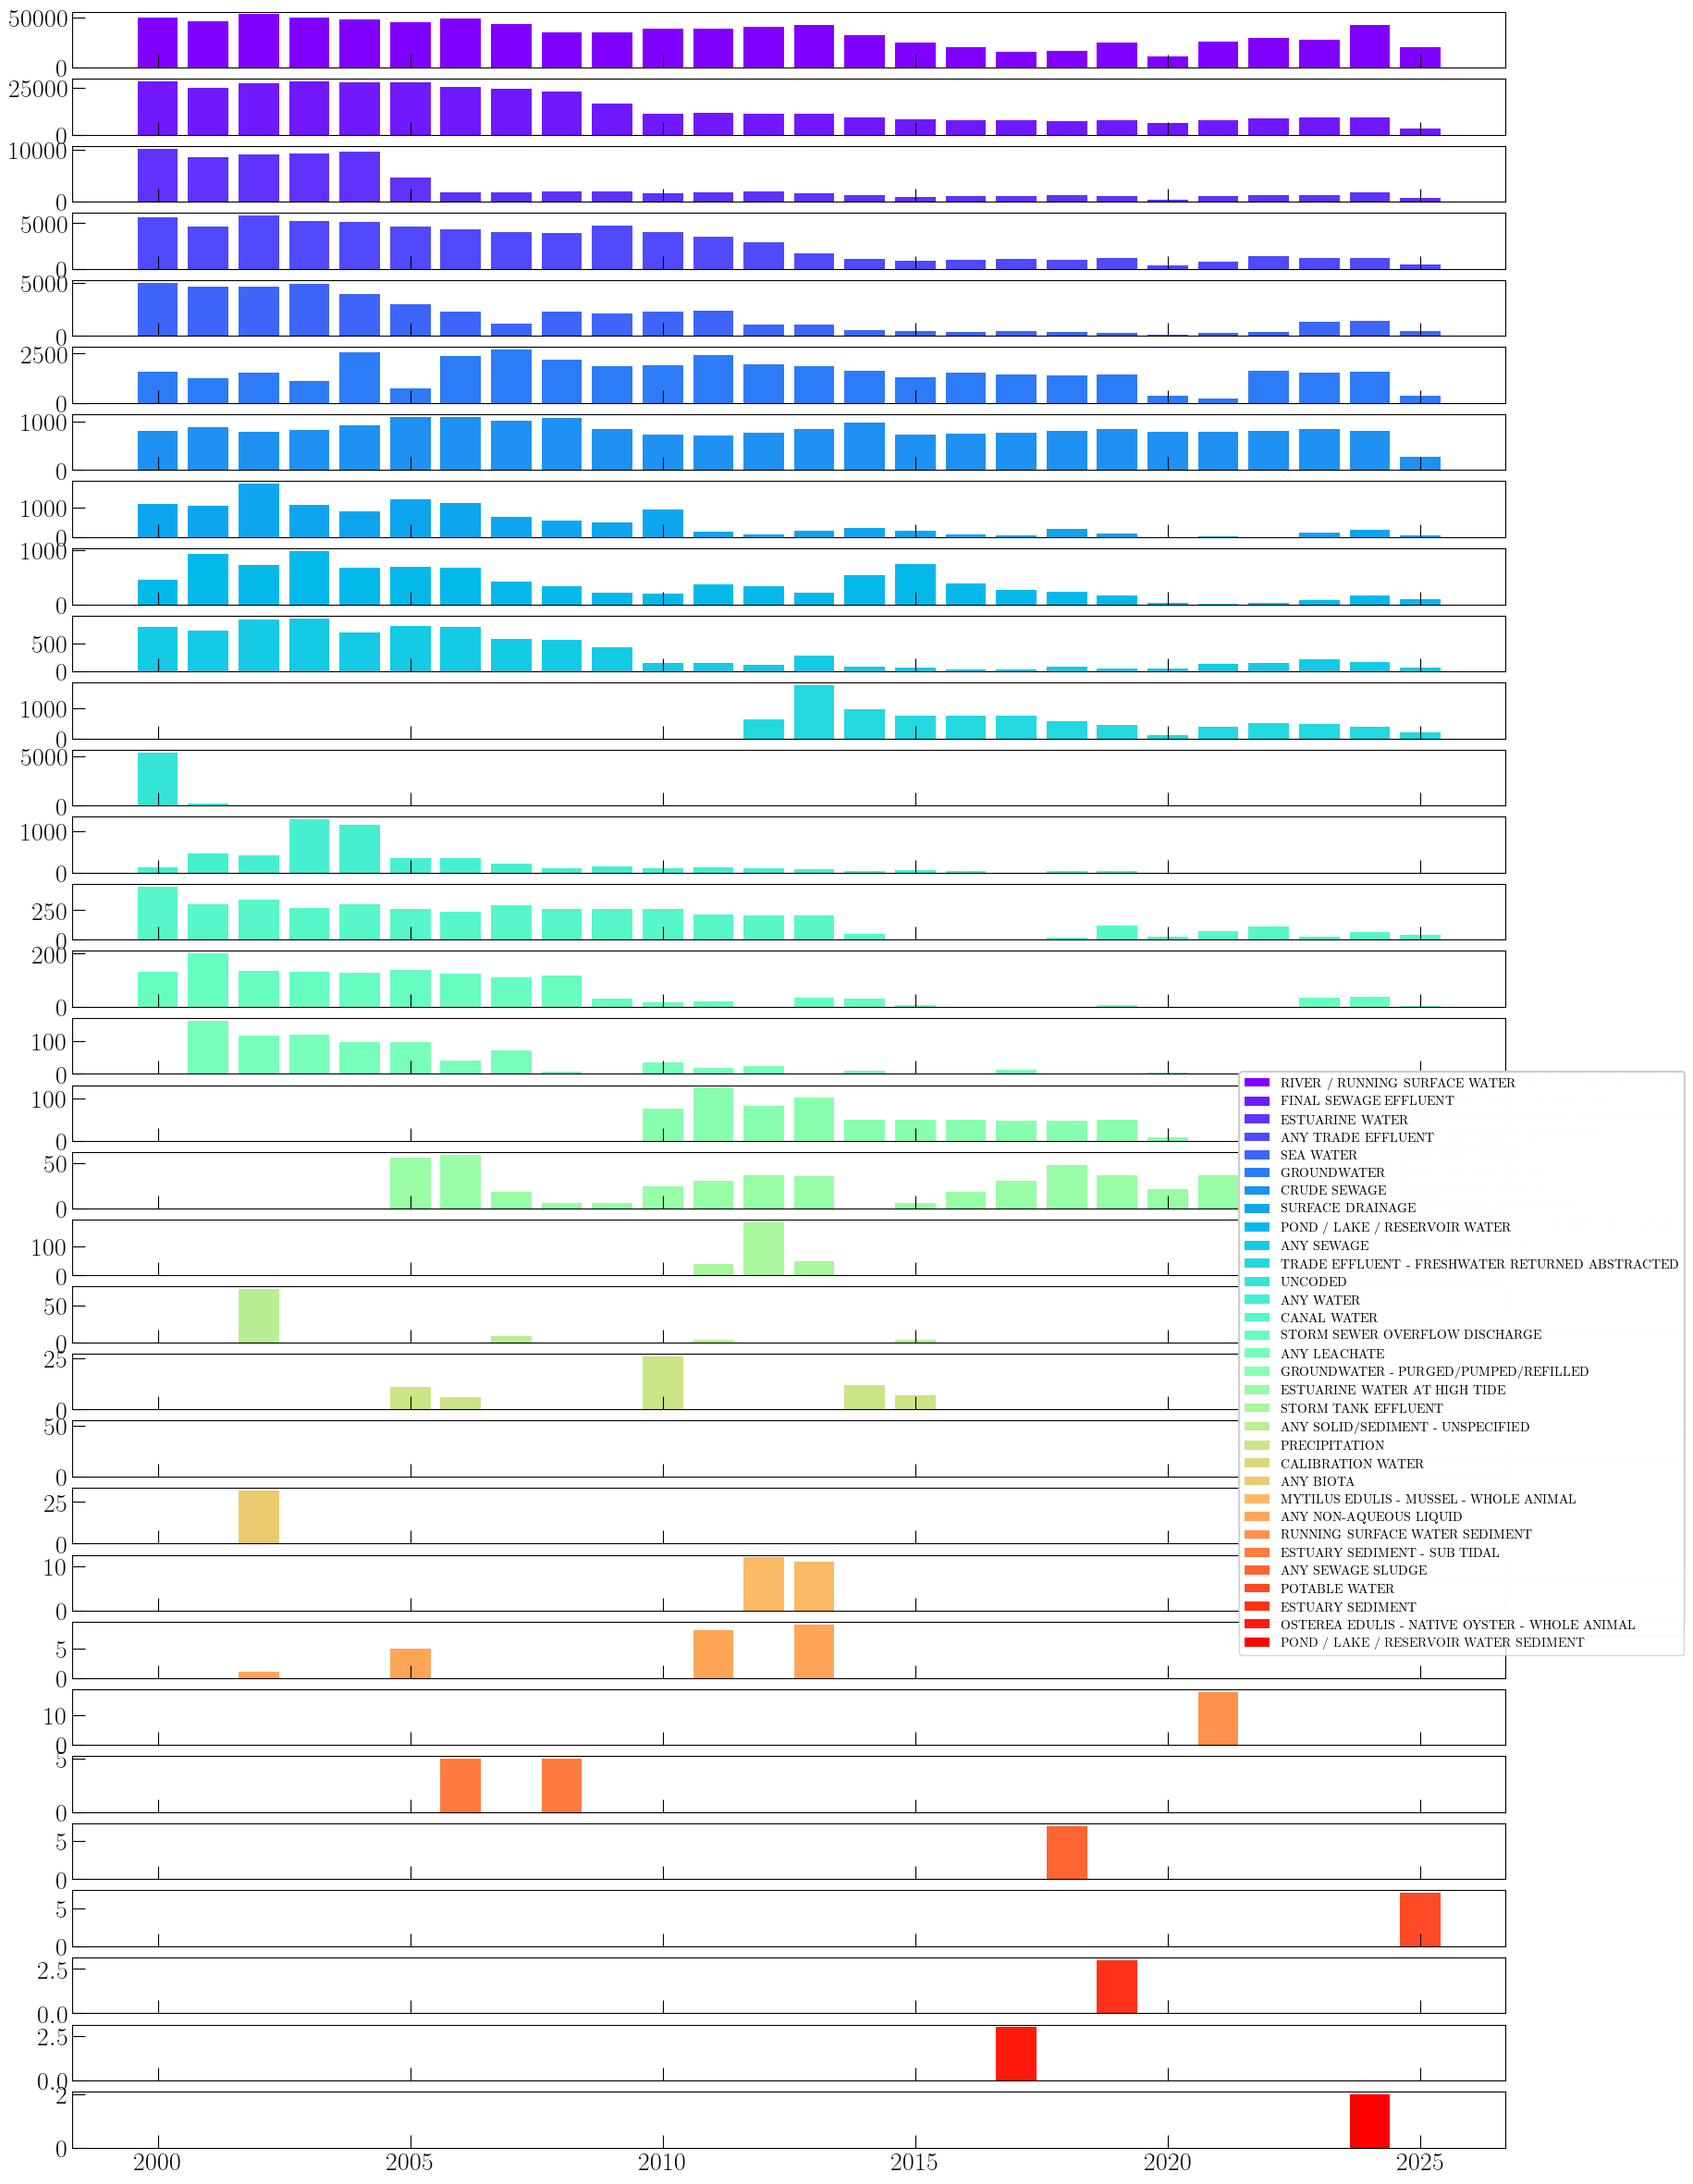

In [24]:
fig, axes = plt.subplots(nrows=len(water_names),ncols=1, sharex=True, figsize=(20,30))
for i in range(len(water_names)):
    axes[i].bar(data[(data.index.get_level_values("sample.sampledMaterialType.label") == \
                      water_names[i])].index.get_level_values('year'), \
                data.loc[(data.index.get_level_values("sample.sampledMaterialType.label") ==\
                         water_names[i])].values, label = water_names[i], color=colors[i])
    fig.legend(bbox_to_anchor=(1., .5))
    fig.set_facecolor("w")

    plt.savefig('WaterType_frequency.png', bbox_inches='tight',  transparent=False)


In [25]:
list(water_names[0:4])

['RIVER / RUNNING SURFACE WATER',
 'FINAL SEWAGE EFFLUENT',
 'ESTUARINE WATER',
 'ANY TRADE EFFLUENT']

In [26]:
df_water = piv[piv["sample.sampledMaterialType.label"].isin(list(water_names[0:4]))]

#### Almost 90% of the catalogue has these 4 labels:

In [27]:
(np.shape(df_water)[0]/np.shape(piv)[0]) 

0.8951152502680418

### Show the results from preprocessing function class


In [28]:
from WaterQuality_project import report_functions as rf

In [29]:
df_pivoted = rf.WaterQualityProcessor.pivot(df)
df_cleaned = rf.WaterQualityProcessor.quantiles(df_pivoted)
df_with_season = rf.WaterQualityProcessor.encoding_season(df_cleaned)
df_with_water = rf.WaterQualityProcessor.filter_top_water_types(df_with_season)


In [30]:
df_with_water

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,@id,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,BOD : 5 Day ATU,Chloride,Nitrate as N,...,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved, % Saturation","Solids, Suspended at 105 C",Temperature of Water,pH,Date,year,month,season
0,2000-01-04T00:01:00,511100,131100,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,2000-01-04,2000,1,1
220,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.7,NaN,NaN,2000-01-04,2000,1,1
219,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,0.0076,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
218,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
217,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620034,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,4.39,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620033,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,4.4,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620032,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,0.03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620031,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.6,NaN,2025-06-12,2025,6,0


In [31]:
processor = rf.WaterQualityProcessor(df)


In [32]:
processor.prepare()

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,@id,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,BOD : 5 Day ATU,Chloride,Nitrate as N,...,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved, % Saturation","Solids, Suspended at 105 C",Temperature of Water,pH,Date,year,month,season
0,2000-01-04T00:01:00,511100,131100,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,2000-01-04,2000,1,1
220,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.7,NaN,NaN,2000-01-04,2000,1,1
219,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,0.0076,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
218,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
217,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620034,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,4.39,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620033,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,4.4,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620032,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,0.03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620031,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.6,NaN,2025-06-12,2025,6,0


In [33]:
df_water

,sample.sampleDateTime,sample.samplingPoint.easting,sample.samplingPoint.northing,sample.sampledMaterialType.label,@id,Ammonia un-ionised as N,Ammoniacal Nitrogen as N,BOD : 5 Day ATU,Chloride,Nitrate as N,...,"Nitrogen, Total Oxidised as N","Orthophosphate, reactive as P","Oxygen, Dissolved, % Saturation","Solids, Suspended at 105 C",Temperature of Water,pH,Date,year,month,season
0,2000-01-04T00:01:00,511100,131100,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,2000-01-04,2000,1,1
220,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.7,NaN,NaN,2000-01-04,2000,1,1
219,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,0.0076,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
218,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
217,2000-01-04T14:38:00,514400,139800,FINAL SEWAGE EFFLUENT,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,9.05,...,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-04,2000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620034,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,4.39,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620033,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,4.4,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620032,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,0.03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-06-12,2025,6,0
1620031,2025-06-12T10:49:00,454767,80513,RIVER / RUNNING SURFACE WATER,http://environment.data.gov.uk/water-quality/d...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.6,NaN,2025-06-12,2025,6,0
